In [1]:
!pip install pyupbit

In [2]:
import pyupbit
import pandas as pd
import numpy as np

df = pyupbit.get_ohlcv("KRW-DOGE")
print(df.tail())

                      open   high    low  close        volume         value
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11


In [3]:
df['range'] = (df['high'] - df['low']) * 0.5
df['range_shift1'] = df['range'].shift(1)
df['target'] = df['open'] + df['range'].shift(1)
print(df.tail())

                      open   high    low  close        volume         value  \
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12   
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12   
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12   
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11   
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11   

                     range  range_shift1  target  
2021-08-16 09:00:00   19.5          35.5   432.5  
2021-08-17 09:00:00   23.5          19.5   395.5  
2021-08-18 09:00:00   22.5          23.5   376.5  
2021-08-19 09:00:00   13.5          22.5   379.5  
2021-08-20 09:00:00    8.5          13.5   386.5  


<AxesSubplot:>

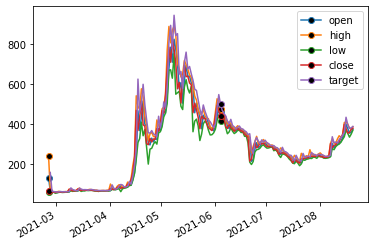

In [4]:
df_plot = df[["open", "high", "low", "close", "target"]]
df_plot.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

<AxesSubplot:>

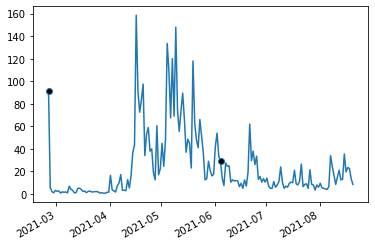

In [5]:
df_range = df["range"]
df_range.plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

In [6]:
df['ror'] = np.where(df['high'] > df['target'], df['close'] / df['target'], 1)
print(df.tail())

                      open   high    low  close        volume         value  \
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12   
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12   
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12   
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11   
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11   

                     range  range_shift1  target       ror  
2021-08-16 09:00:00   19.5          35.5   432.5  1.000000  
2021-08-17 09:00:00   23.5          19.5   395.5  0.892541  
2021-08-18 09:00:00   22.5          23.5   376.5  0.948207  
2021-08-19 09:00:00   13.5          22.5   379.5  1.000000  
2021-08-20 09:00:00    8.5          13.5   386.5  1.000000  


In [7]:
# Accumulated yield
ror = df['ror'].cumprod()[-2]
print(ror)

4.812689486031891


In [8]:
# Fee and slippage consideration
fee = 0.005
df['ror'] = np.where(df['high'] > df['target'], df['close'] / df['target'] - fee, 1)

In [9]:
ror = df['ror'].cumprod()[-2]
print(ror)

3.4094273458687945


In [10]:
# Calculating the best k
def get_ror(k=0.5):
    df = pyupbit.get_ohlcv("KRW-DOGE")
    df['range'] = (df['high'] - df['low']) * k
    df['target'] = df['open'] + df['range'].shift(1)
    
    fee = 0.005
    
    df['ror'] = np.where(df['high'] > df['target'], df['close'] / df['target'] - fee, 1)
    
    ror = df['ror'].cumprod()[-2]
    
    return ror

for k in np.arange(0.1, 1.0, 0.1):
    ror = get_ror(k)
    print("%.1f %f" % (k, ror))

0.1 3.589888
0.2 3.792857
0.3 4.364514
0.4 3.804947
0.5 3.409427
0.6 3.915104
0.7 3.513270
0.8 3.473640
0.9 2.957558


In [11]:
# MDD (Maximum Draw Down)
df['hpr'] = df['ror'].cumprod()
print(df.tail())

                      open   high    low  close        volume         value  \
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12   
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12   
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12   
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11   
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11   

                     range  range_shift1  target       ror       hpr  
2021-08-16 09:00:00   19.5          35.5   432.5  1.000000  4.072732  
2021-08-17 09:00:00   23.5          19.5   395.5  0.887541  3.614717  
2021-08-18 09:00:00   22.5          23.5   376.5  0.943207  3.409427  
2021-08-19 09:00:00   13.5          22.5   379.5  1.000000  3.409427  
2021-08-20 09:00:00    8.5          13.5   386.5  1.000000  3.409427  


In [12]:
df['dd'] = (df['hpr'].cummax() - df['hpr']) / df['hpr'].cummax() * 100
print("MDD(%) : ", df['dd'].max())
print(df.tail())

MDD(%) :  42.94548905538352
                      open   high    low  close        volume         value  \
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12   
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12   
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12   
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11   
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11   

                     range  range_shift1  target       ror       hpr  \
2021-08-16 09:00:00   19.5          35.5   432.5  1.000000  4.072732   
2021-08-17 09:00:00   23.5          19.5   395.5  0.887541  3.614717   
2021-08-18 09:00:00   22.5          23.5   376.5  0.943207  3.409427   
2021-08-19 09:00:00   13.5          22.5   379.5  1.000000  3.409427   
2021-08-20 09:00:00    8.5          13.5   386.5  1.000000  3.409427   

                            dd  
2021-08-16 09:00:00  25.697657 

<AxesSubplot:>

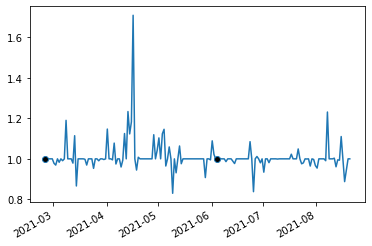

In [13]:
df['ror'].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

<AxesSubplot:>

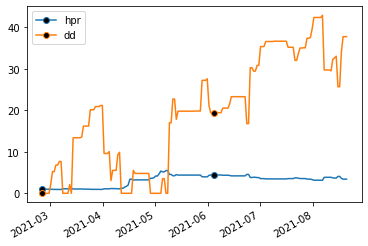

In [14]:
df[['hpr', 'dd']].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

In [15]:
df['ma5'] = df['close'].rolling(window=5).mean().shift(1)
df['bull'] = df['open'] > df['ma5']
print(df.tail())

                      open   high    low  close        volume         value  \
2021-08-16 09:00:00  397.0  409.0  370.0  376.0  4.246654e+09  1.661907e+12   
2021-08-17 09:00:00  376.0  398.0  351.0  353.0  3.801126e+09  1.433742e+12   
2021-08-18 09:00:00  353.0  378.0  333.0  357.0  4.793798e+09  1.699731e+12   
2021-08-19 09:00:00  357.0  375.0  348.0  372.0  1.946438e+09  7.002331e+11   
2021-08-20 09:00:00  373.0  385.0  368.0  378.0  1.018245e+09  3.817977e+11   

                     range  range_shift1  target       ror       hpr  \
2021-08-16 09:00:00   19.5          35.5   432.5  1.000000  4.072732   
2021-08-17 09:00:00   23.5          19.5   395.5  0.887541  3.614717   
2021-08-18 09:00:00   22.5          23.5   376.5  0.943207  3.409427   
2021-08-19 09:00:00   13.5          22.5   379.5  1.000000  3.409427   
2021-08-20 09:00:00    8.5          13.5   386.5  1.000000  3.409427   

                            dd    ma5   bull  
2021-08-16 09:00:00  25.697657  337.4   True 

<AxesSubplot:>

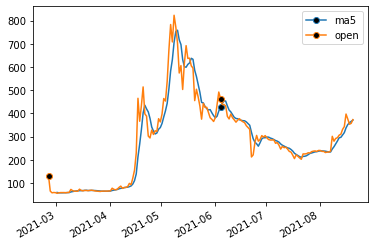

In [18]:
df[['ma5', 'open']].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')

<AxesSubplot:>

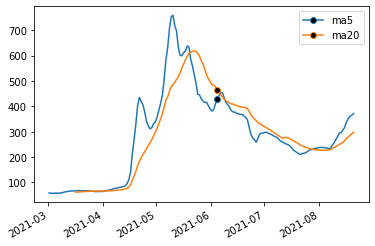

In [19]:
df['ma20'] = df['close'].rolling(window=20).mean().shift(1)
df[['ma5', 'ma20']].plot(linestyle='-', markevery=100, marker='o', markerfacecolor='black')